In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi

from scipy.ndimage import label, generate_binary_structure
from sklearn.metrics.pairwise import euclidean_distances

In [129]:
os.getcwd()

'/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-segmentation/notebook'

In [130]:
IMAGE_DIR = '/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Image/'
MASK_DIR = '/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Mask/'
CLEAN_DIR_IMG ='/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Clean/Image'
CLEAN_DIR_MASK ='/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Clean/Mask'
PREDICT_DIR = '/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Segmentation_output_piv4x4/UNET_base/'

In [131]:
pid_list = os.listdir(PREDICT_DIR)[:10]

In [132]:
pid_list[0]

'0169_PD000_slice002.npy'

In [133]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR)[30:60]:
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        image_id = prediction.replace('PD','NI')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+image_id)
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id)
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid,prediction)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


LIDC-IDRI-0575 0575_PD000_slice011.npy


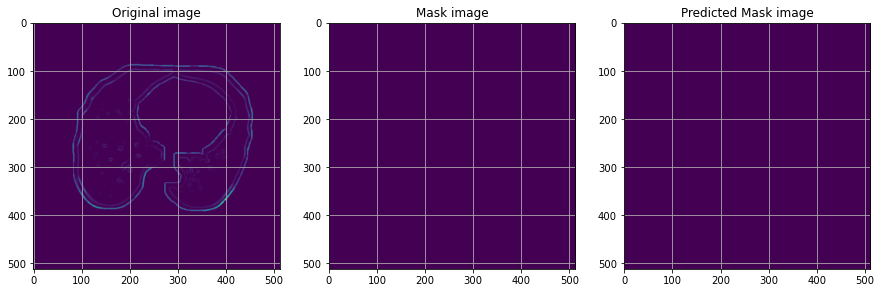

LIDC-IDRI-0921 0921_PD001_slice006.npy


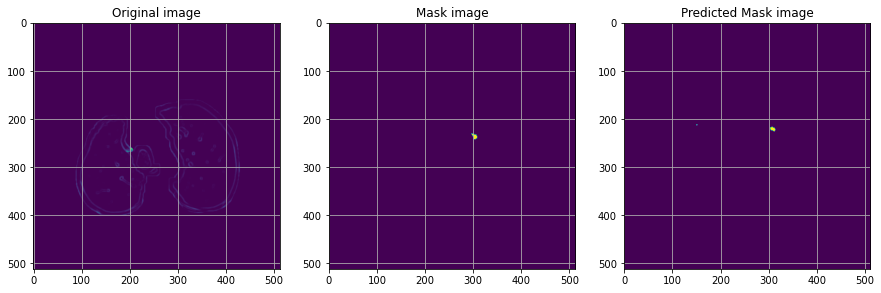

LIDC-IDRI-0663 0663_PD000_slice004.npy


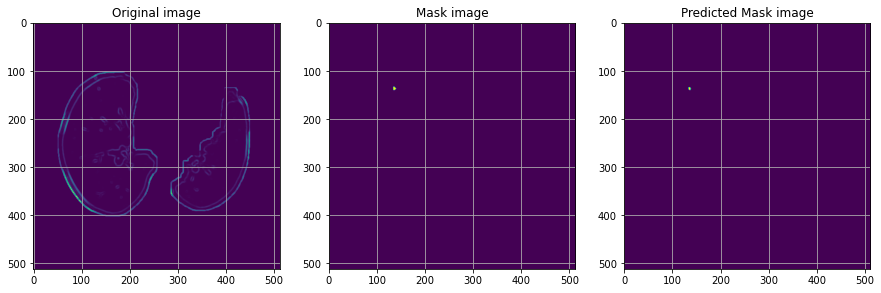

LIDC-IDRI-0142 0142_PD000_slice003.npy


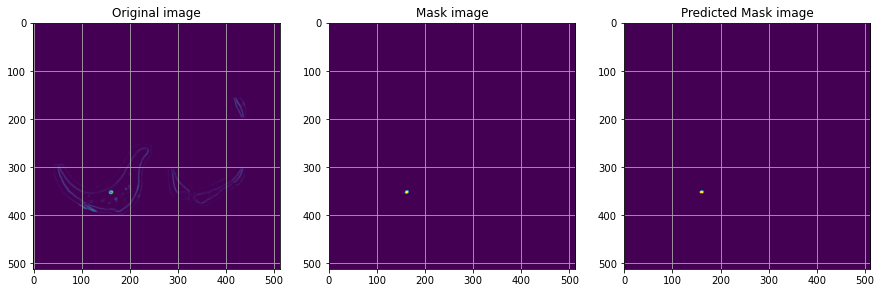

LIDC-IDRI-0022 0022_PD000_slice005.npy


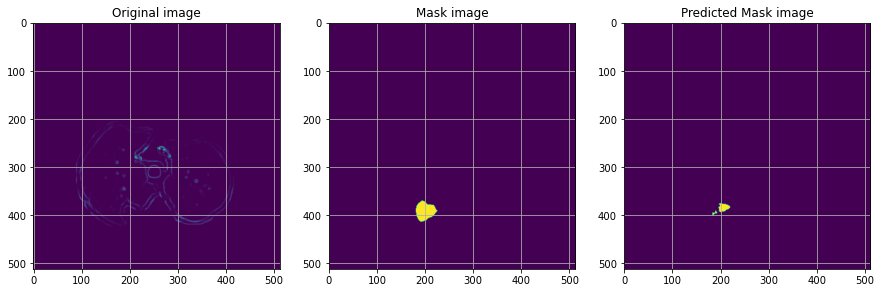

LIDC-IDRI-0043 0043_PD002_slice004.npy


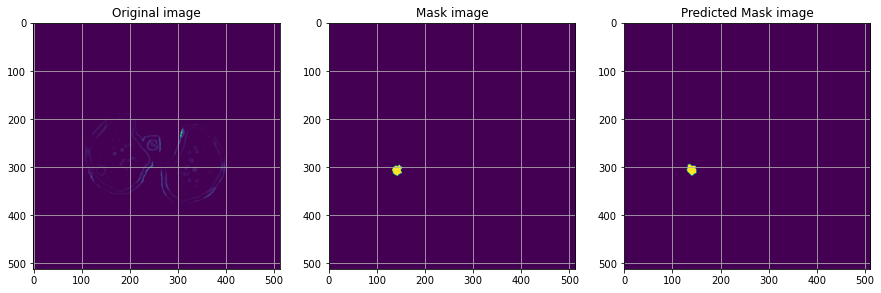

LIDC-IDRI-0477 0477_PD004_slice003.npy


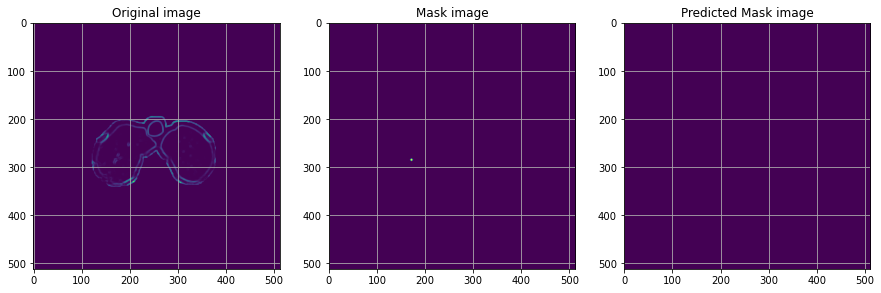

LIDC-IDRI-0796 0796_PD000_slice004.npy


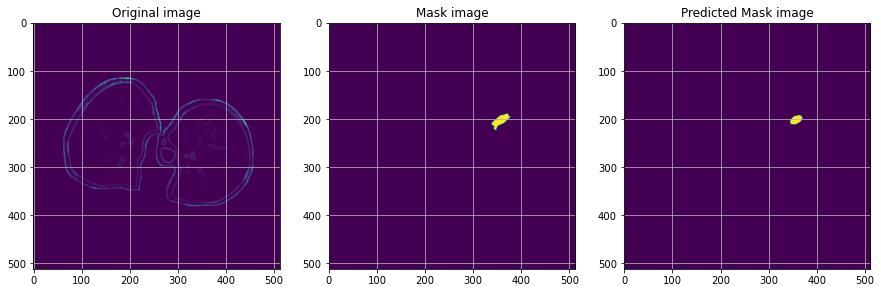

LIDC-IDRI-0870 0870_PD010_slice002.npy


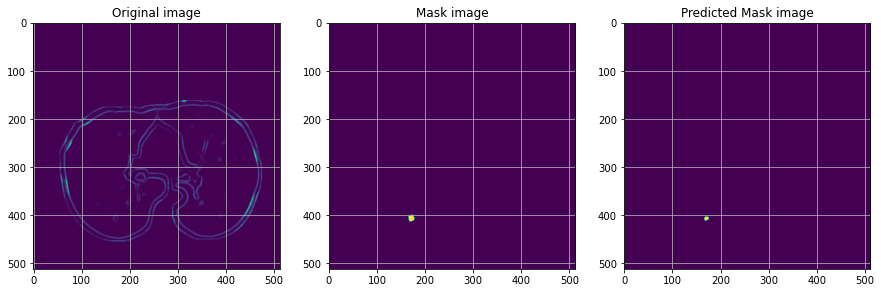

LIDC-IDRI-0302 0302_PD000_slice002.npy


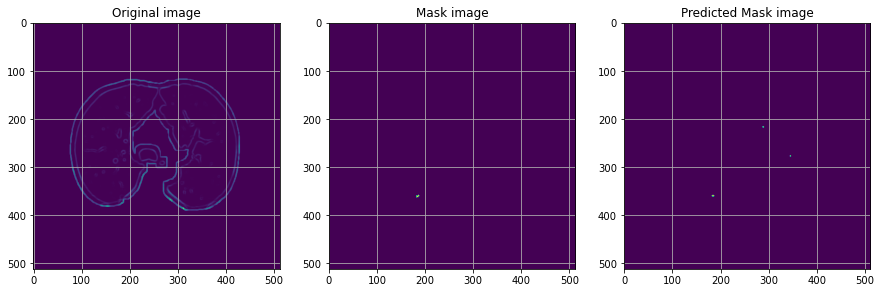

LIDC-IDRI-0724 0724_PD001_slice001.npy


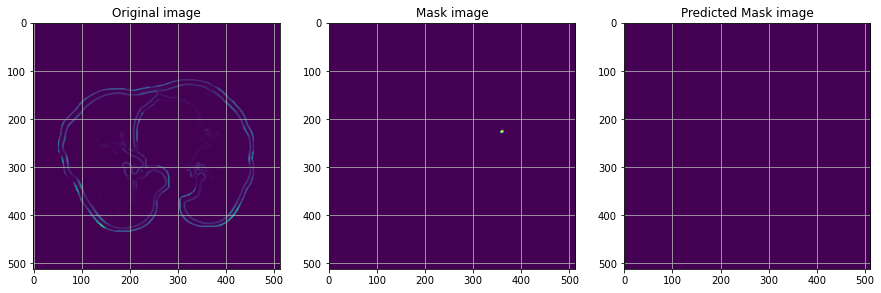

LIDC-IDRI-0920 0920_PD000_slice002.npy


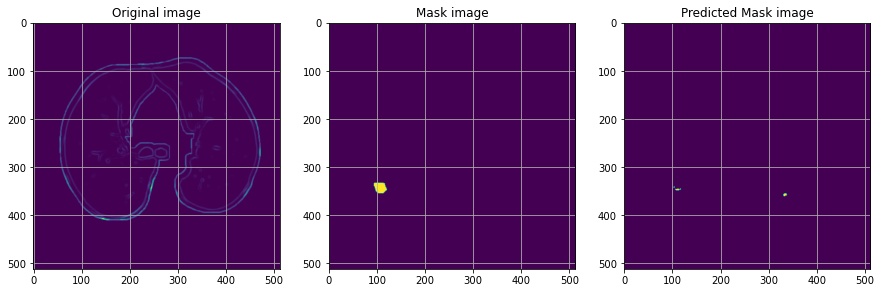

LIDC-IDRI-0870 0870_PD009_slice000.npy


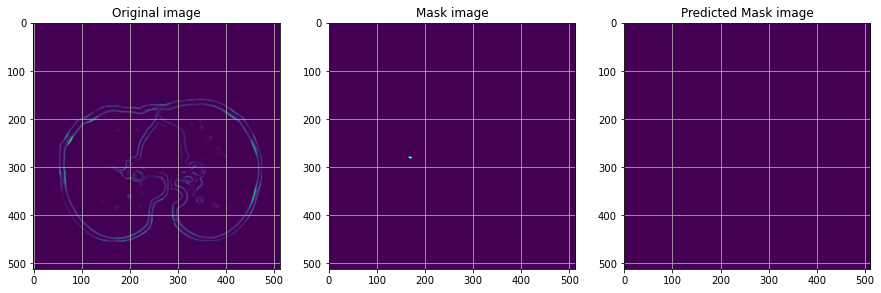

LIDC-IDRI-0820 0820_PD000_slice003.npy


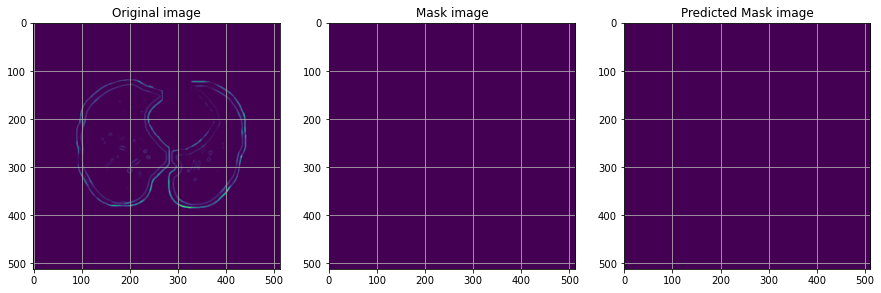

LIDC-IDRI-0159 0159_PD000_slice000.npy


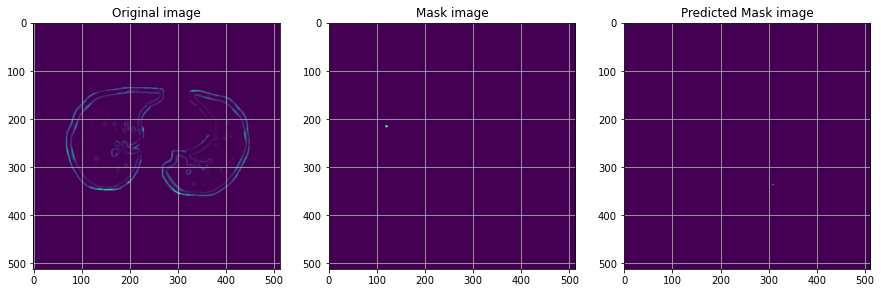

LIDC-IDRI-0385 0385_PD001_slice017.npy


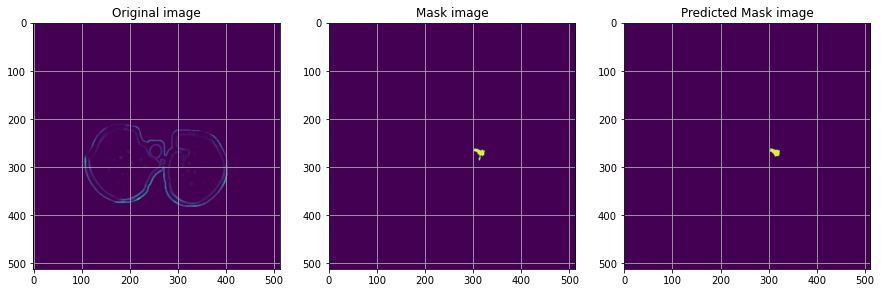

LIDC-IDRI-0920 0920_PD000_slice000.npy


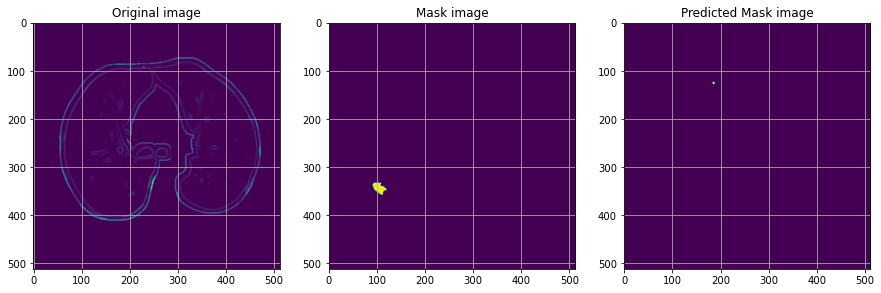

LIDC-IDRI-0388 0388_PD001_slice001.npy


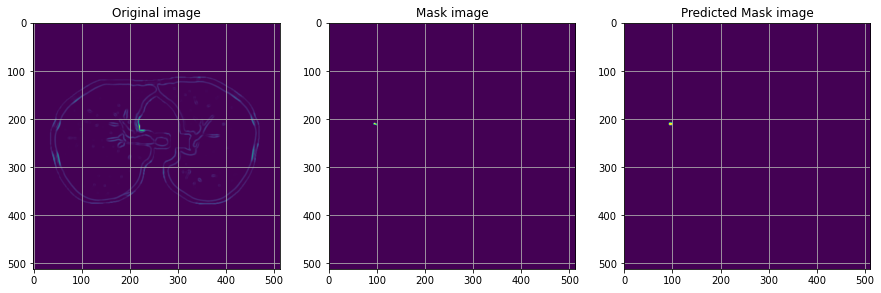

LIDC-IDRI-0421 0421_PD000_slice002.npy


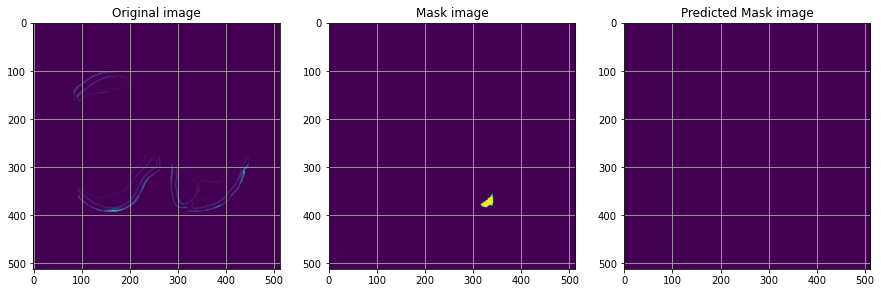

LIDC-IDRI-0673 0673_PD001_slice002.npy


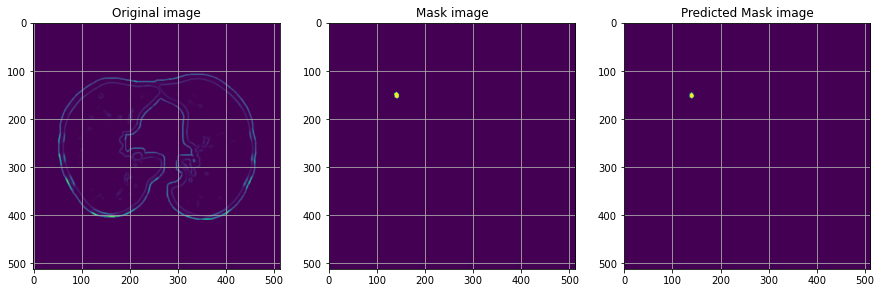

LIDC-IDRI-0858 0858_PD008_slice004.npy


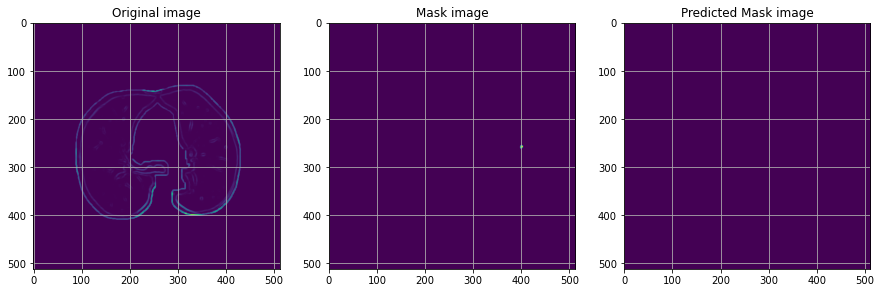

LIDC-IDRI-0313 0313_PD000_slice007.npy


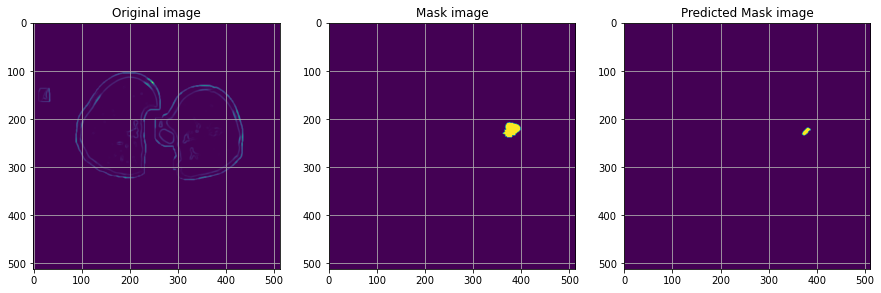

LIDC-IDRI-1008 1008_PD003_slice000.npy


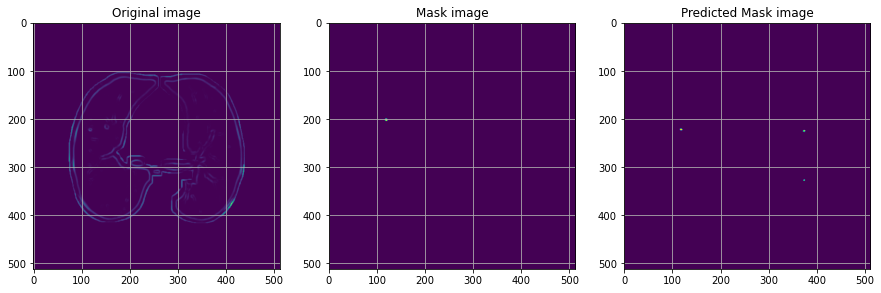

LIDC-IDRI-0236 0236_PD001_slice002.npy


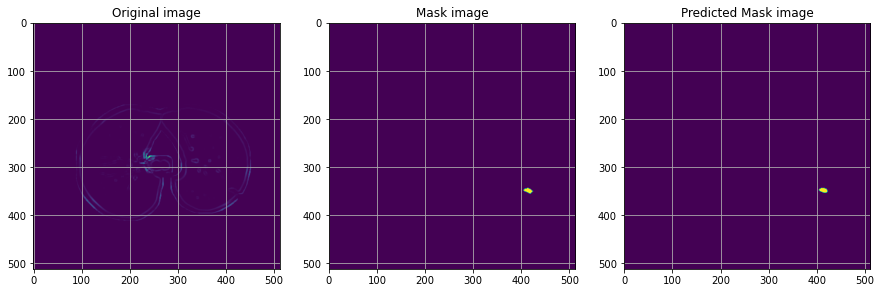

LIDC-IDRI-0099 0099_PD002_slice005.npy


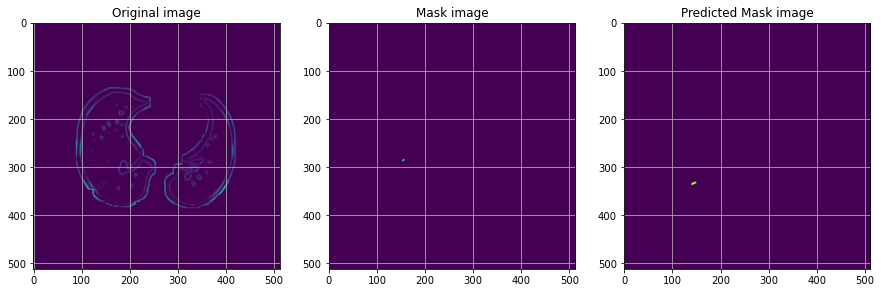

LIDC-IDRI-0302 0302_PD000_slice001.npy


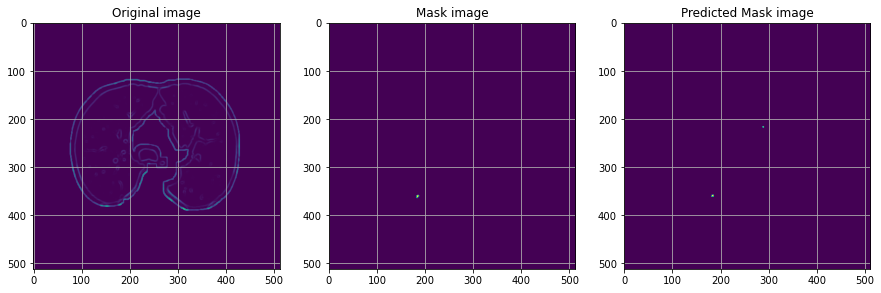

LIDC-IDRI-0106 0106_PD003_slice002.npy


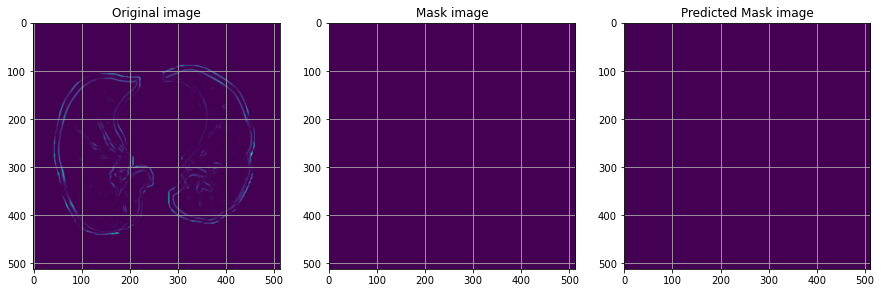

LIDC-IDRI-0660 0660_PD004_slice006.npy


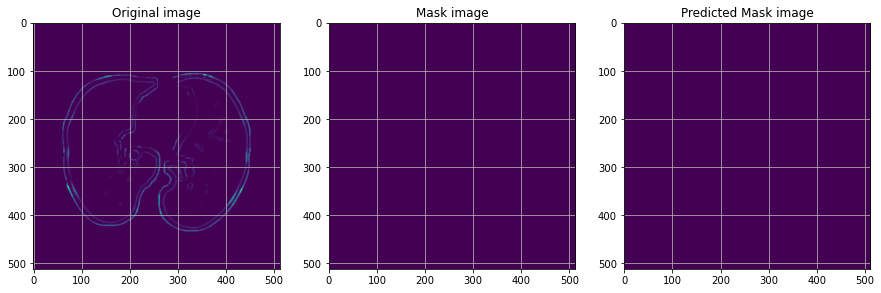

LIDC-IDRI-0792 0792_PD001_slice004.npy


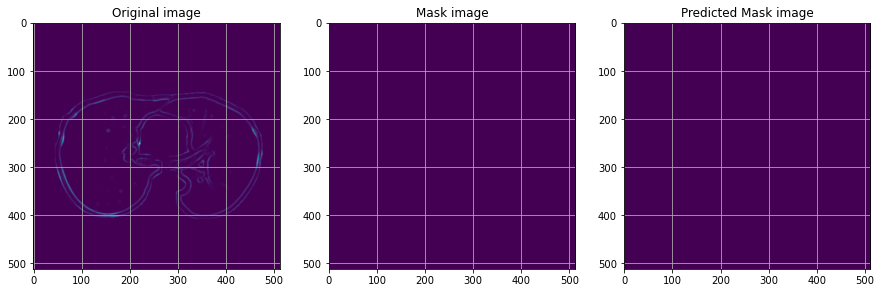

LIDC-IDRI-0477 0477_PD004_slice004.npy


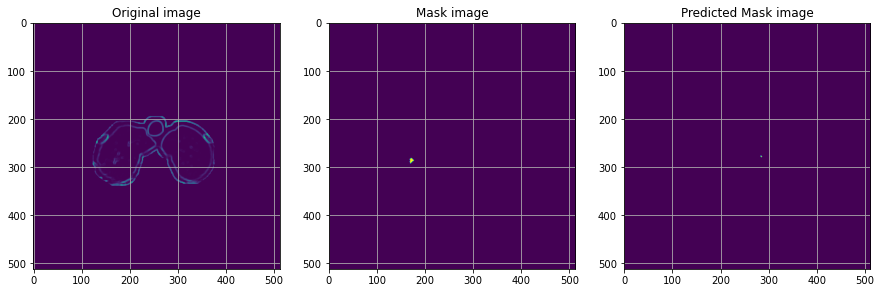

In [48]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [51]:
0018_PD000_slice002.npy

SyntaxError: invalid decimal literal (3509675528.py, line 1)

In [134]:
#original = np.load(IMAGE_DIR+'/LIDC-IDRI-0018/0008_NI000_slice002.npy')
#/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data1/Segmentation_output/UNET_base_LIDC
print(PREDICT_DIR)
original = np.load(IMAGE_DIR+'LIDC-IDRI-0663/0663_NI000_slice004.npy')
predict = np.load(PREDICT_DIR+'/0663_PD000_slice004.npy')
answer = np.load(MASK_DIR+'LIDC-IDRI-0663/0663_MA000_slice004.npy')

/home/sujiwosa/Downloads/LNDS_June2022/LIDC-IDRI-Segmentation-master/lung-preprocessing/data_pivnpy_4x4/Segmentation_output_piv4x4/UNET_base/


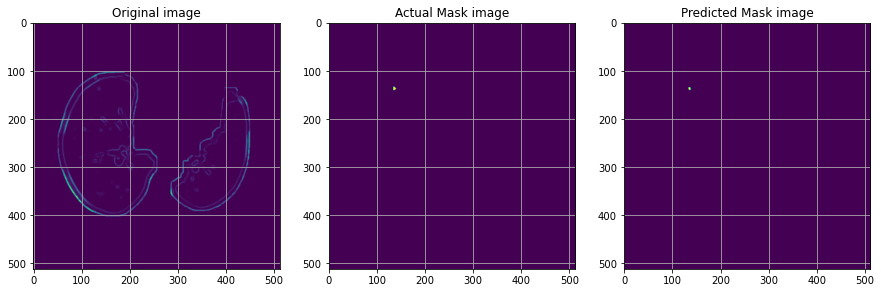

In [135]:
fig,ax = plt.subplots(1,3, figsize=(15,15))
ax[0].title.set_text('Original image')
ax[0].imshow(original)
ax[0].grid()
ax[1].title.set_text('Actual Mask image')
ax[1].imshow(answer)
ax[1].grid()
ax[2].title.set_text('Predicted Mask image')
ax[2].imshow(predict)
ax[2].grid()
plt.savefig("prediction_distance_comparison.png",dpi=300)
plt.show()

In [136]:
ndi.center_of_mass(predict)[0]==np.nan

False

In [137]:
ndi.center_of_mass(predict)[0]

137.44

In [107]:
ndi.center_of_mass(predict)[1]

135.4

In [108]:
ndi.center_of_mass(answer)[0]

137.1818181818182

In [109]:
ndi.center_of_mass(answer)[1]

134.96969696969697

In [74]:
np.isnan(ndi.center_of_mass(predict)[0])

False

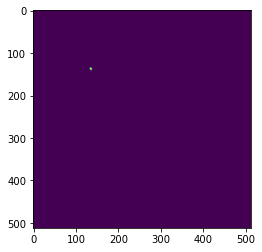

In [140]:
plt.imshow(predict)

In [141]:
print(ndi.center_of_mass(predict)[0],ndi.center_of_mass(predict)[1])

137.44 135.4


In [142]:
predict.shape

(512, 512)

In [143]:
predict[0][0]

0.0

In [144]:
predict[137][135]

1.0

In [147]:
labeled_array1, num_features1 = label(predict)

In [148]:
labeled_array1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [149]:
num_features1

1

In [155]:
labeled_array1[137][135]

1

In [156]:
s = generate_binary_structure(2,2)
print(s)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [157]:
labeled_array, num_features = label(predict, structure=s)

In [158]:
num_features

1

In [165]:
labeled_array[137][135]

1

In [160]:
n=1
lab=np.array(labeled_array)


In [166]:
lab[lab!=(n+1)]=0
lab[lab==(n+1)]=1

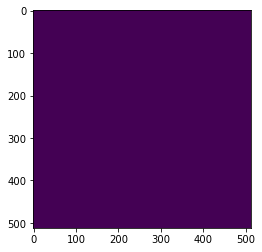

In [167]:
plt.imshow(lab)

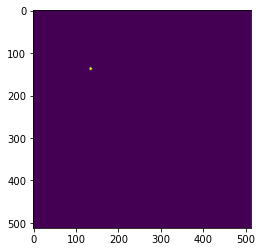

In [121]:
plt.imshow(answer)

In [122]:
np.sum(lab)

0

In [123]:
com= ndi.center_of_mass(lab)
com

(nan, nan)

In [124]:
com_answer= ndi.center_of_mass(answer)

In [125]:
com_answer

(137.1818181818182, 134.96969696969697)

In [126]:
np.linalg.norm(np.array(com)-np.array(com_answer),2)

nan

In [168]:
def calculate_fp(prediction_dir,mask_dir,distance_threshold=80):
    """This calculates the fp by comparing the predicted mask and orginal mask"""
    #TP,TN,FP,FN
    #FN will always be zero here as all the mask contains a nodule
    confusion_matrix =[0,0,0,0]
    s = generate_binary_structure(2,2)
    for prediction in os.listdir(PREDICT_DIR)[:10]:
        #print(confusion_matrix)
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        mask = np.load(mask_dir+'/'+pid+'/'+mask_id)
        predict = np.load(prediction_dir+prediction)
        answer_com = np.array(ndi.center_of_mass(mask))
        # Patience is used to check if the patch has cropped the same image
        patience =0
        labeled_array, nf = label(predict, structure=s)
        if nf>0:
            for n in range(nf):
                lab=np.array(labeled_array)
                lab[lab!=(n+1)]=0
                lab[lab==(n+1)]=1
                predict_com=np.array(ndi.center_of_mass(labeled_array))
                if np.linalg.norm(predict_com-answer_com,2) < distance_threshold:
                    if patience != 0:
                        #print("HIT")
                        continue
                    # add true positive
                    confusion_matrix[0]+=1
                    patience +=1
                else:
                    confusion_matrix[2]+=1
                
        else:
            # Add True Negative since the UNET didn't detect a cancer even when there was one
            confusion_matrix[1]+=1
        
    return confusion_matrix
        
        #[1848, 719, 1309, 0]

In [169]:
confusion_matrix = calculate_fp(PREDICT_DIR,MASK_DIR,distance_threshold=60)

In [170]:
confusion_matrix

[3, 6, 1, 0]

In [171]:
confusion_matrix =[0,0,0,0]

In [95]:
np.sum(testing)

NameError: name 'testing' is not defined

In [173]:
mask=answer

In [174]:
ndi.center_of_mass(mask)

(137.1818181818182, 134.96969696969697)

In [175]:
ndi.center_of_mass(predict)

(137.44, 135.4)

In [241]:
def crop_nodule(center_coord, mask,K=20):
    #print(mask.shape)
    IK=int(K/2)
    maskret=mask[int(center_coord[0])-IK:  int(center_coord[0])+IK,int(center_coord[1])-IK:  int(center_coord[1])+IK]
    print(maskret.shape)
    return maskret

In [242]:
def crop_patch(image,mask):
    return crop_nodule(ndi.center_of_mass(mask),image)
    

In [243]:
patch= crop_patch(original,mask)
print(patch)

(20, 20)
[[2.39023750e+04 2.17467500e+04 1.49344375e+04 7.30800000e+03
  2.65925000e+03 7.35000000e+02 1.74375000e+02 4.03750000e+01
  1.50000000e+01 5.68750000e+01 1.15625000e+02 1.40000000e+02
  1.33500000e+02 9.33125000e+01 3.76250000e+01 1.30000000e+01
  6.00000000e+00 6.00000000e+00 8.25000000e+00 2.40625000e+01]
 [1.87342500e+04 1.15420000e+04 4.82450000e+03 1.17525000e+03
  1.78750000e+02 4.80000000e+01 3.69375000e+01 2.22500000e+01
  1.42500000e+01 4.57500000e+01 9.80000000e+01 1.07375000e+02
  8.90000000e+01 6.86250000e+01 2.71875000e+01 6.87500000e+00
  3.00000000e+00 3.25000000e+00 7.00000000e+00 2.68750000e+01]
 [7.29593750e+03 2.75150000e+03 6.88000000e+02 9.97500000e+01
  1.49375000e+01 2.21250000e+01 3.44375000e+01 3.26250000e+01
  1.80000000e+01 3.06875000e+01 5.45000000e+01 3.78125000e+01
  9.50000000e+00 1.62500000e+01 1.56875000e+01 7.50000000e+00
  4.31250000e+00 2.68750000e+00 6.43750000e+00 2.80625000e+01]
 [1.16637500e+03 2.68000000e+02 8.12500000e+01 2.40000000e

In [244]:
patch.shape

(20, 20)

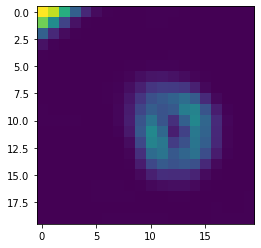

In [245]:
plt.imshow(patch)

In [246]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

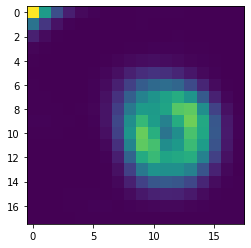

In [247]:
plt.imshow(signal.convolve2d(patch,smooth,mode='valid'))

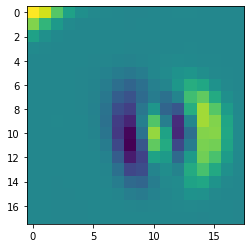

In [248]:
plt.imshow(signal.convolve2d(patch,xder,mode='valid'))

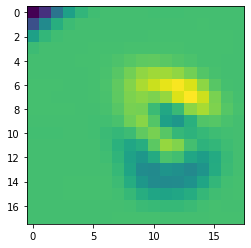

In [249]:
plt.imshow(signal.convolve2d(patch,yder,mode='valid'))

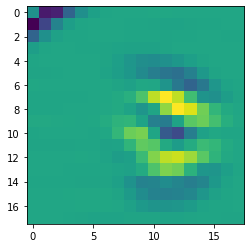

In [250]:
plt.imshow(signal.convolve2d(patch,yder2,mode='valid'))

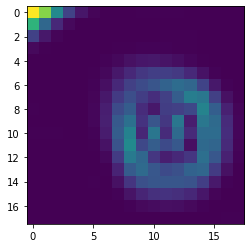

In [251]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

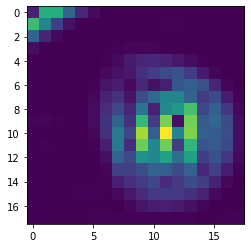

In [252]:
arrx = signal.convolve2d(patch,xder2,mode='valid')
arry = signal.convolve2d(patch,yder2,mode='valid')
plt.imshow(np.hypot(arrx,arry))

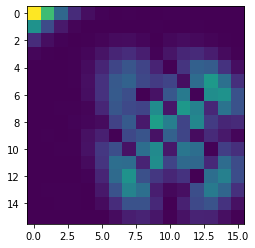

In [253]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
arrx = signal.convolve2d(arrx,yder,mode='valid')
arry = signal.convolve2d(arry,xder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [254]:
def create_tp_coordinates(mask_answer_dir,patient_list):
    """ Creates dataframe storing TP coordinates"""
    df= pd.DataFrame(index=[],columns= ['file_name','nodule_no','tp_x_coord','tp_y_coord'])
    
    for file in patient_list:
        mask = np.load(mask_answer_dir+file)        
        try:
            com = ndi.center_of_mass(mask)
            tmp = pd.Series([file,1,int(com[1]),int(com[0])],index=['file_name','nodule_no','tp_x_coord','tp_y_coord'])
            df = df.append(tmp,ignore_index=True)
        except ValueError:
            #ValueError occurs because the answer sheet doesn't contain any nodule
            #There are answer sheet like these because the U-Net predicted there is a nodule
            continue
            
    return df